In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
import os
from statsmodels.stats.proportion import proportions_chisquare


In [2]:
os.listdir()

['Document.rtf',
 'projet 1.ipynb',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# ANALYSE UNIVARIEE

    140 700 observations
    18 variables

    Gender : variable discrete à 2 modalité

    1 - type de variables :

     
     

In [4]:
train["Working Professional or Student"].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

In [5]:
train.nunique()

id                                       140700
Name                                        422
Gender                                        2
Age                                          43
City                                         98
Working Professional or Student               2
Profession                                   64
Academic Pressure                             5
Work Pressure                                 5
CGPA                                        331
Study Satisfaction                            5
Job Satisfaction                              5
Sleep Duration                               36
Dietary Habits                               23
Degree                                      115
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
dtype: int64

In [6]:
train.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

INDIVIDUS AYANT UN STUDY ET UN JOB SATISFACTIION

In [7]:
double = train.query("`Study Satisfaction`.notna() and `Job Satisfaction`.notna()")

INDIVIDUS AYANT UN STATUT D'ETUDIANT ET PAS DE STUDY SATISFACTION

In [8]:
student = train.query("`Working Professional or Student` == 'Student' and `Study Satisfaction`.isna()")

INDIVIDUS AYANT UN STATUT DE TRAVAILLEUR ET PAS DE JOB SATISFACTION

In [9]:
job = train.query("`Working Professional or Student` == 'Working Professional' and `Job Satisfaction`.isna()")

SUPPPRESSION DES INDIVIDUS

In [10]:

train.drop((job+student+double).index,axis=0,inplace=True)

AGREGATION DES COLONNES JOB SATISFACTION ET STUDY SATISFACTION

In [11]:
train["job and study satisfaction"] = np.where(train["Job Satisfaction"].isna(),train["Study Satisfaction"],train["Job Satisfaction"])

INDIVIDUS AYANT UN STATUT D'ETUDIANT ET PAS DE ACADEMIC PRESSURE

In [12]:
pressure = train.query("`Working Professional or Student` == 'Student' and `Academic Pressure`.isna()" )

In [13]:
pressure.shape

(2, 21)

SUPPRESSION DES INDIVIDUS

In [14]:
train.drop(pressure.index, axis=0,inplace=True)

INDIVIDUS AYANT UN STATUT DE TRAVAILLEUR ET PAS DE WORK PRESSURE

In [15]:
pressure = train.query("`Working Professional or Student` == 'Working Professional' and `Work Pressure`.isna()" )

SUPPRESSION DES INDIVIDUS

In [16]:
train.drop(pressure.index, axis=0,inplace=True)

AGREGATION DES COLONNES ACADEMIC PRESSURE ET WORK PRESSURE

In [17]:
train["pressure"]= np.where(train["Academic Pressure"].isna(),train["Work Pressure"],train["Academic Pressure"])

SUPPRESSION DES COLONNE ACADEMIC PRESSURE, WORK PRESSURE,STUDY SATISFACTION, JOB STAISFACTION

In [18]:
train.drop(["Academic Pressure","Work Pressure","Job Satisfaction","Study Satisfaction"],axis=1,inplace=True)

In [19]:
train.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36593
CGPA                                     112776
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
job and study satisfaction                    0
pressure                                      0
dtype: int64

ETUDIANTS MAIS PAS DE PROFESSION ETUDIANTE

In [20]:
train.query("`Working Professional or Student` == 'Student' and Profession != 'Student' and Profession.notna()").shape

(31, 18)

CREATION D'UNE NOUVELLE MODALITE A LA VARIABLE " working pro or sutdent"

In [21]:
train["Working Professional or Student"] = np.where(
    (train["Working Professional or Student"] == 'Student') & (train["Profession"] != 'Student') & (train["Profession"].notna()),
    "double",
    train["Working Professional or Student"]
)

PRO MAIS PAS DE PRFESION ETUDIANTE

In [22]:
train.query("`Working Professional or Student` == 'Working Professional' and Profession == 'Student' and Profession.notna()")

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,job and study satisfaction,pressure
11509,11509,Prisha,Female,22.0,Thane,Working Professional,Student,NaN,7-8 hours,Moderate,B.Com,Yes,5.0,2.0,No,0,2.0,3.0
25447,25447,Gaurav,Male,60.0,Pune,Working Professional,Student,NaN,5-6 hours,Unhealthy,M.Pharm,No,8.0,1.0,Yes,0,2.0,3.0
73447,73447,Harsha,Male,35.0,Ahmedabad,Working Professional,Student,NaN,Less than 5 hours,Moderate,BSc,No,1.0,3.0,Yes,0,2.0,4.0
88617,88617,Ayush,Male,29.0,Srinagar,Working Professional,Student,NaN,5-6 hours,Moderate,BE,No,10.0,1.0,Yes,0,2.0,4.0


ON PASSE CES INDIVIDUS EN WORKING PRO OR SUTDENT EN STUDENT

In [23]:
train['Working Professional or Student'] = np.where(
    (train["Working Professional or Student"] == 'Working Professional') & (train["Profession"] == 'Student') & (train["Profession"].notna()),
    "Student",
    train["Working Professional or Student"]
)

ON PASSE TOUS LES ETUDIANTS EN PROFESSION ETUDIANT

In [24]:
train["Profession"]= np.where(train["Working Professional or Student"] == "Student", "Student", train["Profession"])

POUR LES ACTIFS DONT ON NE CONNAIT PAS LE TRAVAIL, ON LES PASSE EN  "INCONNU"

In [25]:
train["Profession"] = np.where(train.Profession.isna(),"Unknown", train["Profession"])

POUR LES DONNES MANQUANT CGPA, ON REMPLACE PAR -1

In [26]:
train["CGPA"] = np.where(train["CGPA"].isna() , -1, train["CGPA"])

ON REMPLACE LES DIETARY HABITS MANQUANTS PAR "Unknown"

In [27]:
train["Dietary Habits"] = np.where(train["Dietary Habits"].isna() , "Unknown", train["Dietary Habits"])

ON REPLACE LES DEGREE MANQUANTS PAR "Unknown"

In [28]:
train["Degree"] = np.where(train["Degree"].isna() , "Unknown", train["Degree"])

ON REMPLACE LES FINANCIAL STRESS MANQUANTS PAR LE MODE

In [29]:
train["Financial Stress"].fillna(train["Financial Stress"].mode()[0],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18328\3343635242.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Financial Stress"].fillna(train["Financial Stress"].mode()[0],inplace=True)


In [30]:
train.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
job and study satisfaction               0
pressure                                 0
dtype: int64

In [31]:
train["Financial Stress"].value_counts()

Financial Stress
2.0    31453
5.0    28267
4.0    27759
1.0    27202
3.0    25980
Name: count, dtype: int64

In [32]:
train.index= train["id"]
train.drop(columns=["id"],axis=1,inplace=True)

In [33]:
discrete= set(train.select_dtypes(include="object").columns)
discrete.add("Depression")


In [34]:
ordinal = ["Financial Stress","job and study satisfaction","pressure"]
discrete_quant = ["Age", "Work/Study Hours"]

In [35]:
continuous = ["CGPA"]

In [36]:
discrete

{'City',
 'Degree',
 'Depression',
 'Dietary Habits',
 'Family History of Mental Illness',
 'Gender',
 'Have you ever had suicidal thoughts ?',
 'Name',
 'Profession',
 'Sleep Duration',
 'Working Professional or Student'}

ANALYSE UNIVARIEE ET BIVARIEE

In [37]:
#variable name
discrete= discrete - {"name"}


<Axes: xlabel='Dietary Habits', ylabel='count'>

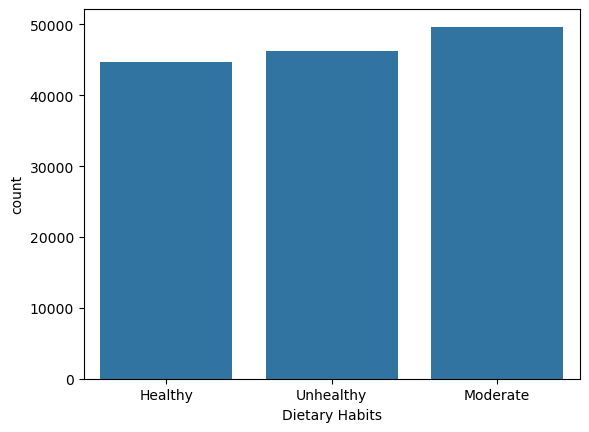

In [65]:
#variable Dietary Habits

v = train["Dietary Habits"].value_counts()
modalites = list(v.index[0:3])
train["Dietary Habits"] = np.where(train["Dietary Habits"].isin(modalites), train["Dietary Habits"],"Unknown")

temp = train.query("`Dietary Habits` != 'Unknown'")

sns.countplot(temp,x="Dietary Habits")



In [81]:
#TEST DHYPOTHESE
# H0 : les données sont équiréparties

f_obs = temp["Dietary Habits"].value_counts()
f_theo = np.array([f_obs.values.sum()//3 for i in range(3)])

In [85]:
chisquare(f_obs,f_theo)

Power_divergenceResult(statistic=275.42945518153505, pvalue=1.5532942355023722e-60)

<Axes: xlabel='Depression', ylabel='Dietary Habits'>

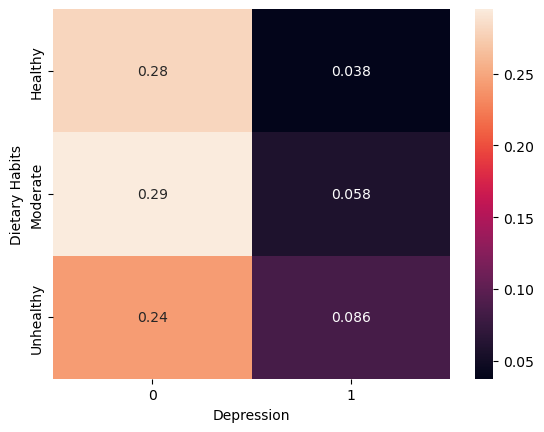

In [102]:
#tableau de contingence vs Drepression
temp = train.query("`Dietary Habits` != 'Unknown'")
sns.heatmap(pd.crosstab(temp["Dietary Habits"],temp["Depression"],normalize=True),annot=True)

In [117]:
tableau_proportions = pd.crosstab(temp["Dietary Habits"],temp["Depression"]).div(pd.crosstab(temp["Dietary Habits"],temp["Depression"]).sum(axis=0), axis=1)

<Axes: xlabel='Depression', ylabel='Dietary Habits'>

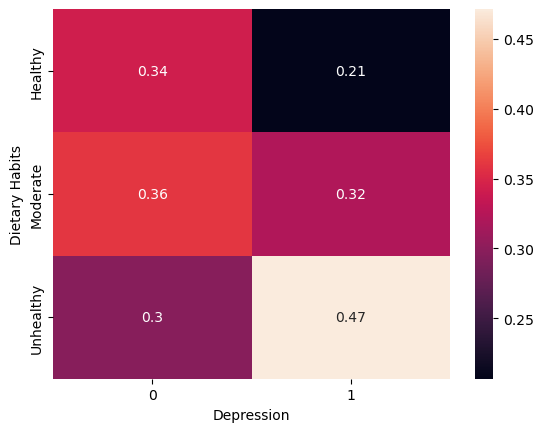

In [118]:
sns.heatmap(tableau_proportions,annot=True)

In [ ]:
chi2, p, _, _ = chi2_contingency(pd.crosstab(temp["Dietary Habits"],temp["Depression"]))

In [ ]:
    n = np.sum(pd.crosstab(temp["Dietary Habits"],temp["Depression"]))  # Nombre total d'observations
    # Calculer le coefficient de contingence
    C = np.sqrt(chi2 / (chi2 + n))

c:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Depression
0    0.027388
1    0.112616
dtype: float64

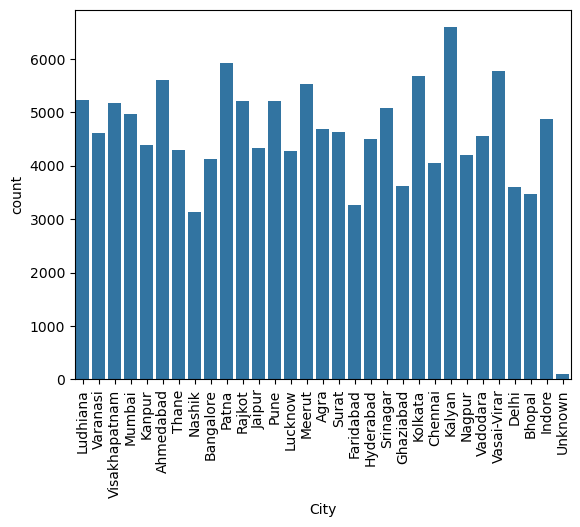

In [94]:
# City
city = train["City"].value_counts()
modalites = city[city<10].index 
train["City"] = np.where(train["City"].isin(modalites), "Unknown",train["City"])

sns.countplot(train,x="City")
plt.xticks(rotation=90);

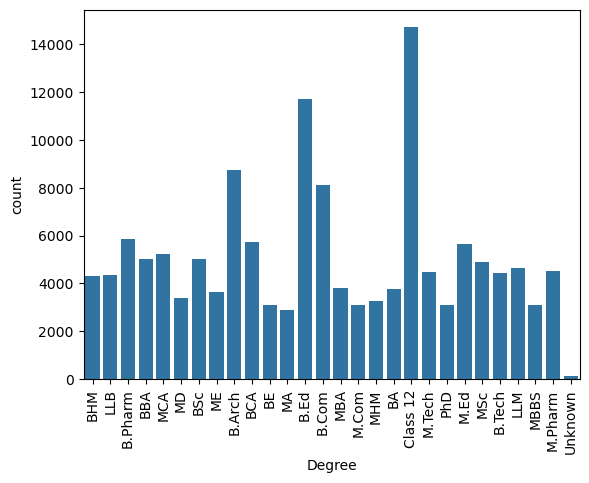

In [ ]:
#Degree
d = train.Degree.value_counts()
modalites = d[d<10].index 
train["Degree"] = np.where(train["Degree"].isin(modalites), "Unknown",train["Degree"])

sns.countplot(train,x="Degree")
plt.xticks(rotation=90);

<Axes: xlabel='Family History of Mental Illness', ylabel='count'>

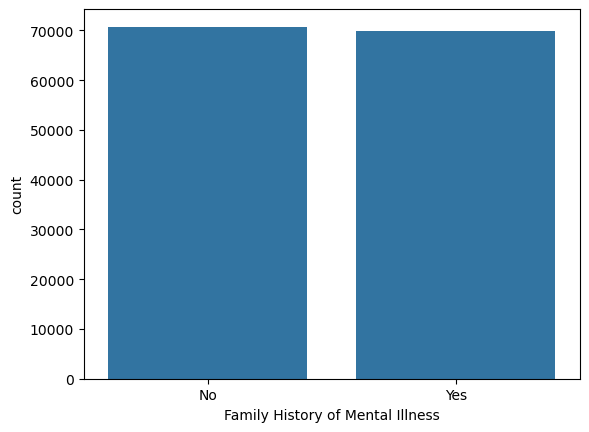

In [ ]:
#'Family History of Mental Illness'
train['Family History of Mental Illness'].value_counts()
sns.countplot(train,x='Family History of Mental Illness')

<Axes: xlabel='Gender', ylabel='count'>

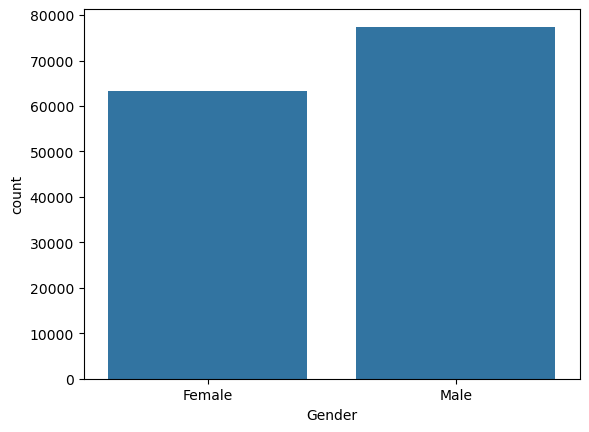

In [ ]:
#Gender
train["Gender"].value_counts()
sns.countplot(train, x="Gender")

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

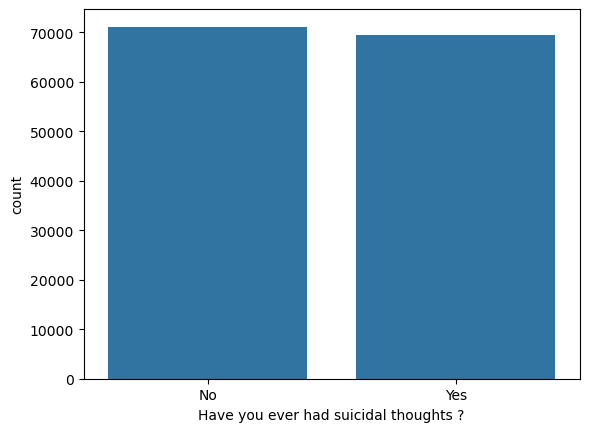

In [ ]:
#'Have you ever had suicidal thoughts ?'
train["Have you ever had suicidal thoughts ?"].value_counts()
sns.countplot(train,x='Have you ever had suicidal thoughts ?')


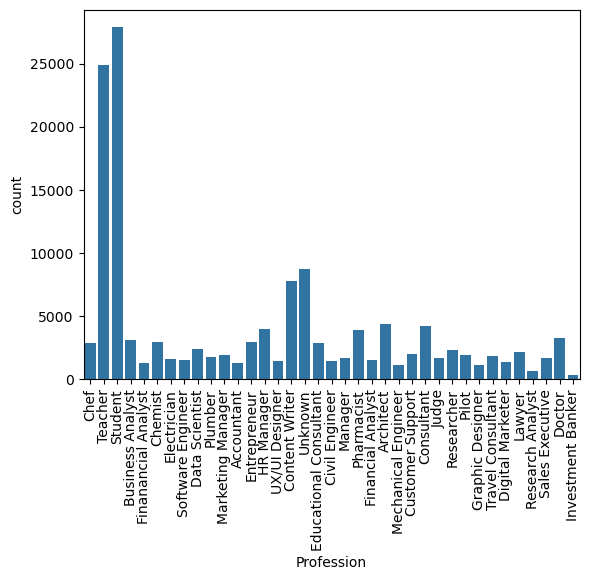

In [96]:
#'Profession'
p = train.Profession.value_counts()
modalites = p[p<10].index
train["Profession"] = np.where(train["Profession"].isin(modalites),"Unknown",train["Profession"])
sns.countplot(train.query("Profession != 'Unknonwn'"),x="Profession")
plt.xticks(rotation=90);


<Axes: xlabel='Sleep Duration', ylabel='count'>

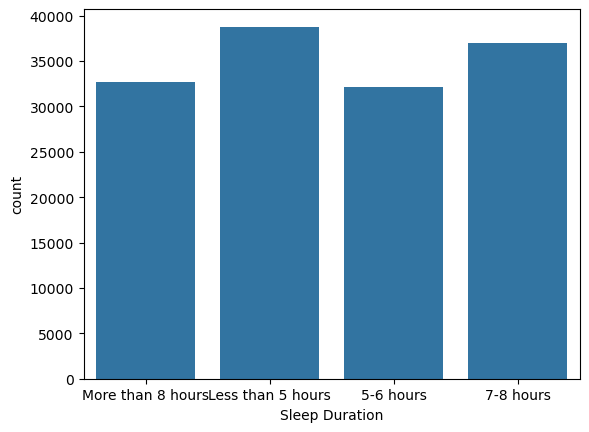

In [98]:
t = train["Sleep Duration"].value_counts()
modalites = t.index[:4]
train["Sleep Duration"] = np.where(train["Sleep Duration"].isin(modalites),train["Sleep Duration"],"Unknown")
sns.countplot(train.query("`Sleep Duration` != 'Unknown'"),x="Sleep Duration")

<Axes: xlabel='Working Professional or Student', ylabel='count'>

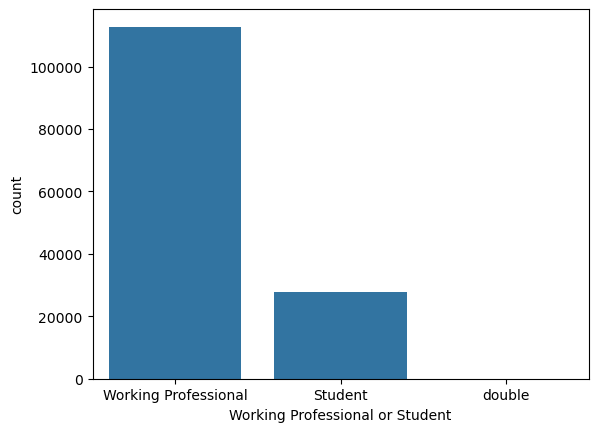

In [ ]:
#'Working Professional or Student'
sns.countplot(train,x='Working Professional or Student' )

<Axes: xlabel='Depression', ylabel='count'>

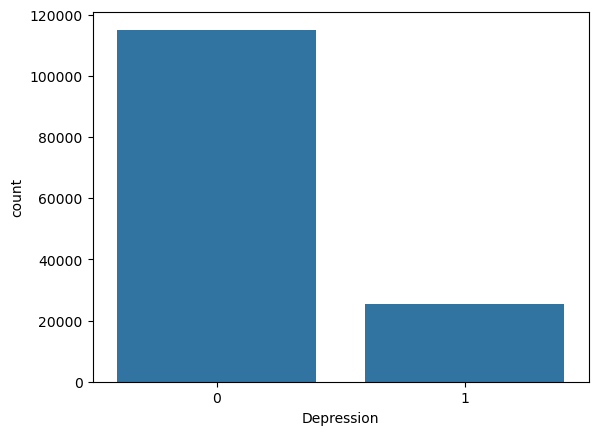

In [ ]:
#Depression
sns.countplot(train,x="Depression")

In [ ]:
ordinal

['Financial Stress', 'job and study satisfaction', 'pressure']

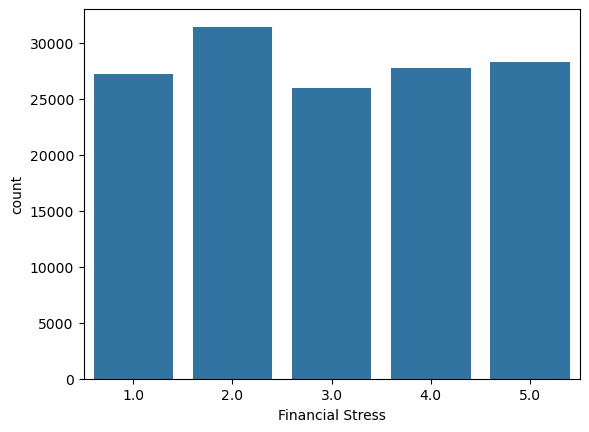

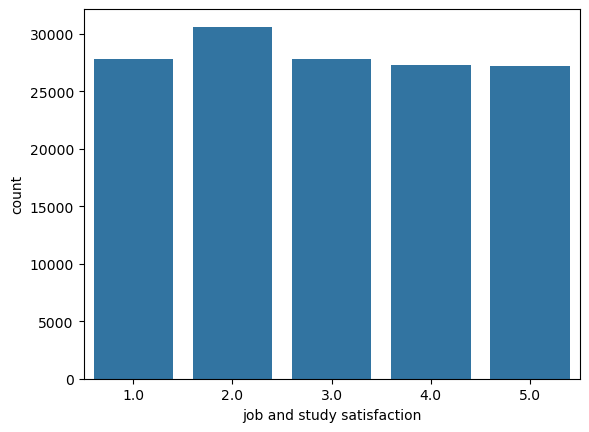

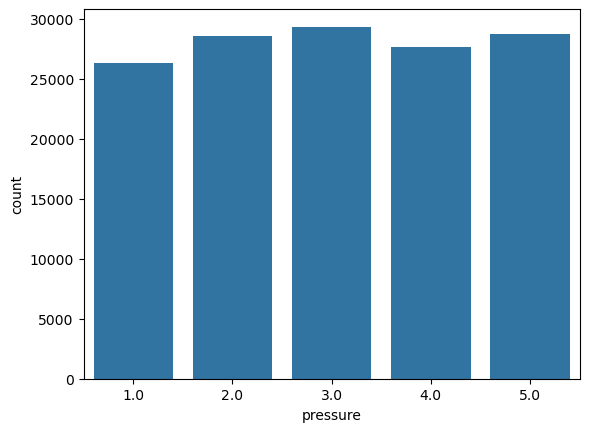

In [ ]:
# Financial Stress
for c in ordinal :
    plt.figure()
    sns.countplot(train,x=c)
    

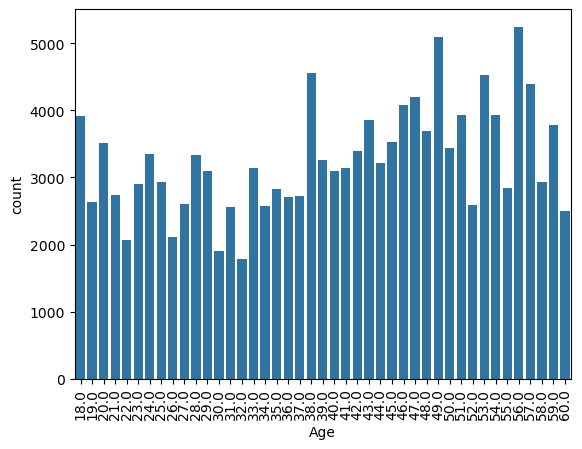

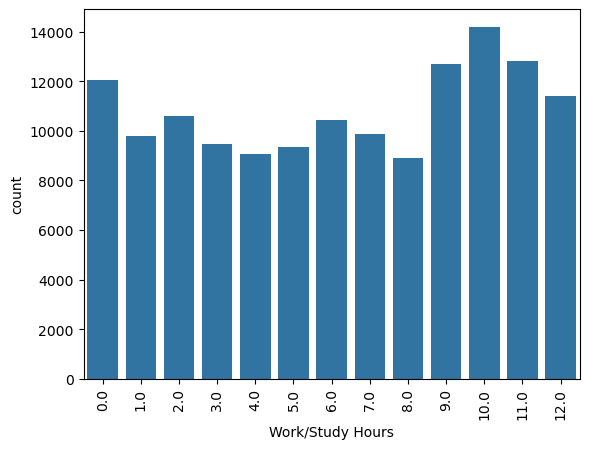

In [ ]:
#discrete_quant
for c in discrete_quant :
    plt.figure()
    sns.countplot(train,x=c)
    plt.xticks(rotation=90)

In [68]:
#continuous

cgpa = train.query(" CGPA != -1 ")
cgpa["CGPA"].describe()

count    27885.000000
mean         7.658695
std          1.464390
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

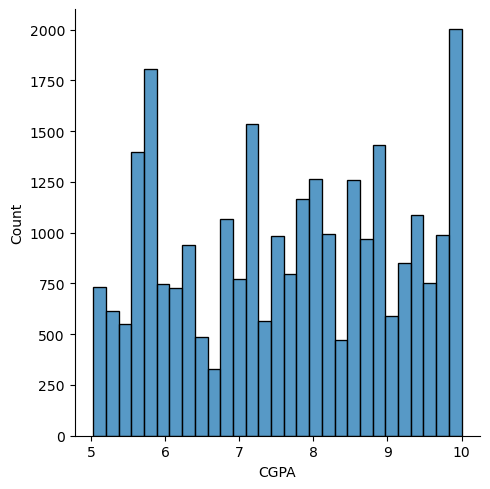

In [ ]:
sns.displot(cgpa,x = "CGPA")

In [69]:
cgpa.groupby("Depression")["CGPA"].describe()

,count,mean,std,min,25%,50%,75%,max
Depression,,,,,,,,
0,11557.0,7.620768,1.483909,5.03,6.25,7.64,8.93,10.0
1,16328.0,7.685540,1.449862,5.03,6.37,7.85,8.91,10.0


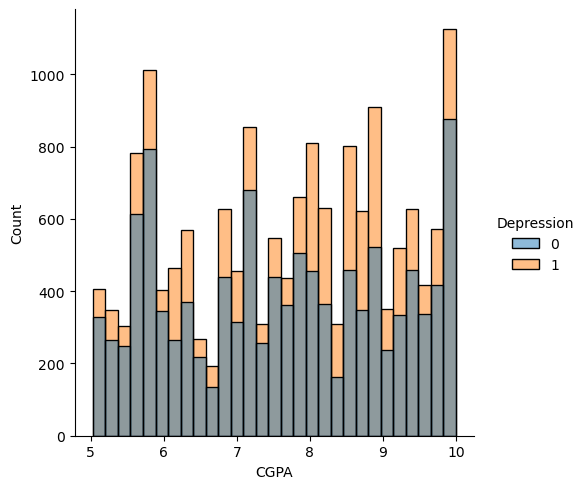

In [ ]:
sns.displot(data=cgpa, x = "CGPA", hue = "Depression" )

<Axes: xlabel='CGPA'>

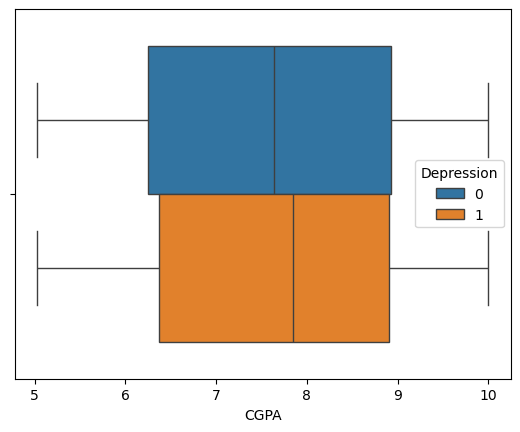

In [74]:
sns.boxplot(data=cgpa, x="CGPA",hue="Depression")

In [72]:
p_value

3.581463163782956e-10